In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [3]:
# dir_path = os.path.dirname(os.path.realpath(__file__))
# record_export_folder = os.path.join(record_export_folder, 'recordings')
record_export_folder = 'recordings'
# file_path = os.path.join(record_export_folder, 'test10.csv')
file_path = os.path.join(record_export_folder, 'neutral_w_blink.csv')

In [4]:
df = pd.read_csv(file_path, skiprows=0, header=1)

In [5]:
keep_cols = ['Timestamp', 'EEG.Counter', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8']

In [6]:
trimmed_df = df[keep_cols]

In [7]:
trimmed_df.head

<bound method NDFrame.head of          Timestamp  EEG.Counter       EEG.P7       EEG.O1       EEG.O2  \
0     1.600981e+09        103.0  4612.307617  3943.589844  3900.512939   
1     1.600981e+09        104.0  4624.615234  3948.205078  3904.102539   
2     1.600981e+09        105.0  4627.692383  3945.641113  3890.256348   
3     1.600981e+09        106.0  4613.333496  3942.564209  3891.794922   
4     1.600981e+09        107.0  4624.102539  3959.487061  3917.948730   
...            ...          ...          ...          ...          ...   
1289  1.600981e+09        102.0  4601.025879  3946.666748  3864.615479   
1290  1.600981e+09        103.0  4601.025879  3950.256348  3872.820557   
1291  1.600981e+09        104.0  4610.256348  3952.820557  3875.384521   
1292  1.600981e+09        105.0  4607.692383  3949.743652  3867.692383   
1293  1.600981e+09        106.0  4597.436035  3940.000000  3863.076904   

           EEG.P8  
0     4317.436035  
1     4321.538574  
2     4318.974121  
3

In [8]:
def plot_col_in_df(df, col):
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    plt.plot(df[col].values) 
    plt.show()

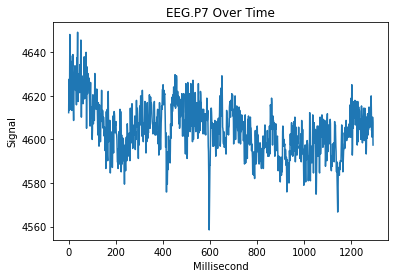

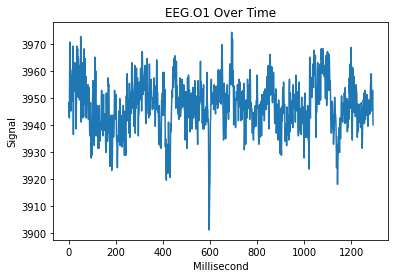

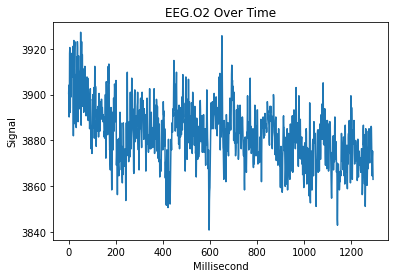

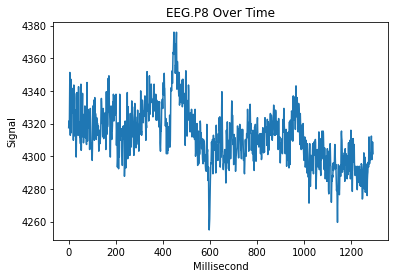

In [9]:
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df(trimmed_df, col)

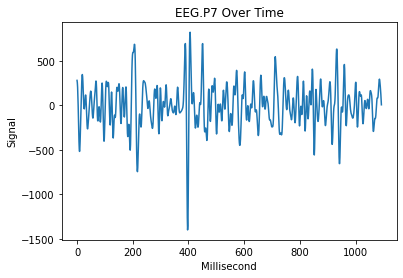

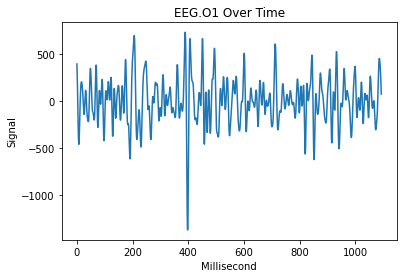

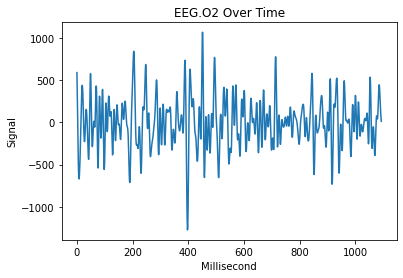

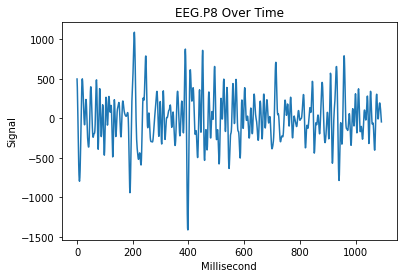

In [10]:
from scipy.signal import butter, lfilter, filtfilt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

def plot_col_in_df_filtered(df, col):
    fs = 500.0
    lowcut = 10.0
    highcut = 50.0
    
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    
    vals = df[col].values
    filtered = butter_bandpass_filter(vals, lowcut, highcut, fs)
#     filtered = new_filter(vals)
    plt.plot(filtered[200:]) 
    plt.show()

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    data = data * 50    # amplify data
#     y = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y

def new_filter(data):
    filter = signal.firwin(400, [0.01, 0.06], pass_zero=False)
    return signal.convolve(data, filter, mode='same')

# Sample rate and desired cutoff frequencies (in Hz).

# Plot the frequency response for a few different orders.
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df_filtered(trimmed_df, col)